# Voting Classifier sur Titanic 

En plus du Stacking, il y a une autre technique de Machine Learning d'ensemble qui s'appelle le Voting Classifier. Sur un principe similaire au bagging, le but est de mettre plusieurs algorithme de classification ensemble et de faire une vote sur les algorithmes qui ont les meilleures performances sur un scénario du dataset. 

Regardons cela ensemble sur Titanic


1. Importez les librairies usuelles 

In [0]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

2. Importez le dataset dans un DataFrame 

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.4%20--%20R%C3%A9duction%20de%20Dimensions%20%26%20Boosting/S4-4%20--%20Ensemble%20Learning/Dataset/titanic.csv?token=AFB53D3JDX5ZOR7W4KKTB4K6IEN4Y")

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Passez par la même phase de preprocessing que lorsque nous avons fait du Stacking 

In [0]:
dataset["Ticket"] = dataset["Ticket"].apply(len)
dataset["Name"] = dataset["Name"].apply(len)

dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"]

dataset["IsAlone"] = dataset["FamilySize"].apply(lambda x:1 if x<=0 else 0)

dataset["Cabin"] = dataset["Cabin"].apply(lambda x:1 if type(x) == str else 0)

dataset["Age"] = dataset["Age"].interpolate()

dataset = dataset.dropna()

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,23,male,22.0,1,0,9,7.2500,0,S,1,0
1,2,1,1,51,female,38.0,1,0,8,71.2833,1,C,1,0
2,3,1,3,22,female,26.0,0,0,16,7.9250,0,S,0,1
3,4,1,1,44,female,35.0,1,0,6,53.1000,1,S,1,0
4,5,0,3,24,male,35.0,0,0,6,8.0500,0,S,0,1


4. Séparez votre dataset en X & y qui sont respectivement les variables explicatives et la variable cible

In [5]:
X = dataset.iloc[:,2:]
y = dataset.iloc[:, dataset.columns=="Survived"]
cat = []
num = []
for e in X.columns :
  print(type(X[e][0]))
  if type(X[e][0]) == str :
    cat.append(True)
    num.append(False)
  else :
    cat.append(False)
    num.append(True)

X_cat = X.loc[:,cat]
X_num = X.loc[:,num]

X_cat = pd.get_dummies(X_cat,drop_first=True)

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>


5. Faites un train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, X_train_num, X_test_num, y_train, y_test = train_test_split(X_cat, X_num, y, test_size=0.25, stratify=y)

6. Normalisez votre dataset

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_num = sc_x.fit_transform(X_train_num)
X_test_num = sc_x.transform(X_test_num)

In [0]:
X_train_num

array([[ 0.80891016,  1.54101326, -0.57690798, ..., -0.52056927,
         0.03046424,  1.21484008],
       [-1.62329826, -0.33423955,  1.37690663, ...,  1.92097393,
         0.03046424,  1.21484008],
       [ 0.80891016,  0.43792337, -0.65063684, ..., -0.52056927,
        -0.56627642, -0.82315361],
       ...,
       [-0.40719405, -0.44454854,  0.34470269, ..., -0.52056927,
         0.03046424,  1.21484008],
       [ 0.80891016, -0.99609348,  0.93453351, ..., -0.52056927,
         0.62720489,  1.21484008],
       [-0.40719405, -1.21671146, -0.83495897, ..., -0.52056927,
        -0.56627642, -0.82315361]])

In [0]:
X_train = np.concatenate((X_train_num, X_train_cat), axis =1)
X_test = np.concatenate((X_test_num, X_test_cat), axis = 1)

7. Importez les modèles suivants : 

- Random Forest
- GradientBoostingClassifier 
- LogisticRegression 
- Naive Bayes

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

8. Créez une liste vide qu'on appellera ```classifiers```. Puis ajoutez lui une instance de chacun des modèles que vous avez importés 

In [0]:
classifiers = []

classifiers.append(RandomForestClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(LogisticRegression())
classifiers.append(BernoulliNB())

9. Sur chacun des modèles, faites une cross-validation sur chacun d'entre eux et stockez les résultats dans une liste qu'on appellera ```cv_results```

In [0]:
from sklearn.model_selection import cross_val_score

cv_results = []
for classifier in classifiers:
  cv_results.append(cross_val_score(classifier, X_train, y_train, cv=10 ,scoring="accuracy"))

In [16]:
cv_results

[array([0.82089552, 0.86567164, 0.7761194 , 0.8358209 , 0.80597015,
        0.82089552, 0.83333333, 0.77272727, 0.86363636, 0.74242424]),
 array([0.76119403, 0.86567164, 0.80597015, 0.88059701, 0.85074627,
        0.82089552, 0.81818182, 0.81818182, 0.87878788, 0.6969697 ]),
 array([0.76119403, 0.8358209 , 0.76119403, 0.80597015, 0.82089552,
        0.82089552, 0.81818182, 0.83333333, 0.78787879, 0.6969697 ]),
 array([0.79104478, 0.71641791, 0.68656716, 0.76119403, 0.74626866,
        0.74626866, 0.72727273, 0.75757576, 0.65151515, 0.74242424])]

10. Créez un DataFrame dans lequel vous aurez : 

- Col 1 = Le nom de l'algorithme 
- Col 2 = Le score d'accuracy moyen 
- Col 3 = L'écart type 

Triez ensuite les performance des algorithmes par ordre décroissant

In [17]:
results = pd.DataFrame({"Algorithm": ["Random_Forest", "GradientBoosting", "LogisticRegression", "NaiveBayes"],
             "Accuracy_mean": [cv_result.mean() for cv_result in cv_results],
             "Std": [cv_result.std() for cv_result in cv_results]})

results = results.sort_values(by="Accuracy_mean", ascending=False)
results

,Algorithm,Accuracy_mean,Std
1,GradientBoosting,0.819720,0.053812
0,Random_Forest,0.813749,0.037953
2,LogisticRegression,0.794233,0.041322
3,NaiveBayes,0.732655,0.037830


11. Visualisez ces résultats dans un barplot

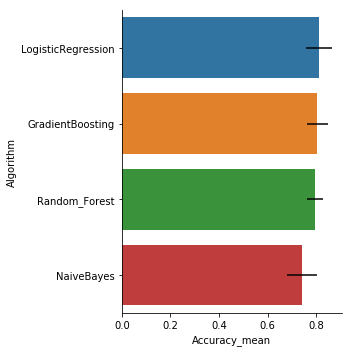

In [0]:
sns.catplot(x='Accuracy_mean', 
            y="Algorithm", 
            data=results, 
            kind="bar", 
            **{'xerr':[cv_result.std() for cv_result in cv_results]})

12. Faites une Grid Search pour chacun des modèles afin de prendre les plus optimum 

In [0]:
from sklearn.model_selection import GridSearchCV

In [20]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [0.05,0.1],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,gb_param_grid, cv=10, scoring="accuracy", verbose = 1)

gsGBC.fit(X_train,np.ravel(y_train))

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  1.8min finished


0.839280868385346

In [21]:
randF = RandomForestClassifier()
randF_param_grid = {'bootstrap': [True, False],
                     'max_depth': [10, 50, 80, None],
                     'max_features': ['auto', 'sqrt'],
                     'min_samples_leaf': [1, 4],
                     'min_samples_split': [2, 10],
                     'n_estimators': [50, 200]}

gsrandF = GridSearchCV(randF,randF_param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)
gsrandF.fit(X_train, y_train)

gsrandF_best = gsrandF.best_estimator_
gsrandF.best_score_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  3.7min finished


0.8452962460425149

In [0]:
gsrandF.score(X_test, y_test)

0.8385650224215246

In [25]:
Log = LogisticRegression()
log_param_grid = {"solver":["newton-cg", "liblinear", "sag", "saga"],
                 "class_weight": [None, "balanced"],
                 "C": [0.5, 0.6,0.7,0.8,0.9,1.0],
                 "tol": [1e-4, 1e-3]}
gsLog = GridSearchCV(Log, log_param_grid, cv =10, scoring ='accuracy', n_jobs=-1, verbose=1)
gsLog.fit(X_train, y_train)
gsLog_best = gsLog.best_estimator_
gsLog.best_score_


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:    7.2s finished


0.7987336047037539

In [0]:
gsLog_best.score(X_test, y_test)

0.7623318385650224

In [27]:
Naive_Bayes = BernoulliNB()
naive_bayes_param_grid = {
    
                 "alpha":[1.0, 0.8, 0.7, 0.5],
                 "fit_prior": [True, False]
    
                 }


gsNaive_Bayes = GridSearchCV(Naive_Bayes, naive_bayes_param_grid, cv =10, scoring ='accuracy', n_jobs=-1, verbose=1)
gsNaive_Bayes.fit(X_train, y_train)
gsNaive_Bayes_best = gsLog.best_estimator_
gsNaive_Bayes.best_score_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  77 out of  80 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


0.7341474445952059

13. Importez Voting Classifier et insérez chacun des modèles que vous avez optimisés

In [0]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[("GradientBoosting", GBC_best),("Random Forest",gsrandF_best),("LogisticRegression",gsLog_best),("Naive Bayes",gsNaive_Bayes_best)], 
                           voting='soft')

votingC = votingC.fit(X_train,y_train)


14. Regardez votre score 

In [29]:
votingC.score(X_test, y_test)

0.8116591928251121

15. Faites une cross-validation pour voir si ce score tient sur toutes les données 

In [31]:
cross_val_score(votingC, X_train, y_train, scoring = "accuracy", cv = 10, n_jobs=4).mean()

0.05807635648828634

---> Le score est encore mieux ! 

16. Lorsque vous faites un votingC, il faut toujours garder en tête de mettre des modèles assez peu corrélés. En effet, si vous prenez deux modèles basés sur des arbres boostés, ils fonctionneront surement de la même manière et donc ne pourront pas se complémenter 

Créez une matrice de correlation dans laquelle vous aurez les prédictions de chacun des algorithmes que vous avez mis dans VotingC sur ```X_test```

Regardez les résultats 

In [0]:
# corrélation sur les prédictions (0 ou 1)
test_Survived_NaiveBayes = pd.Series(gsNaive_Bayes_best.predict(X_test), name="Naive Bayes")
test_Survived_LogReg = pd.Series(gsLog_best.predict(X_test), name="Log")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")
test_Survived_RF = pd.Series(gsrandF_best.predict(X_test), name="RF")

#corrélation sur les probabilités (P(y=1))
"""test_Survived_NaiveBayes = pd.Series(gsNaive_Bayes_best.predict_proba(X_test)[:,1], name="Naive Bayes")
test_Survived_LogReg = pd.Series(gsLog_best.predict_proba(X_test)[:,1], name="Log")
test_Survived_GBC = pd.Series(GBC_best.predict_proba(X_test)[:,1], name="GBC")
test_Survived_RF = pd.Series(gsrandF_best.predict_proba(X_test)[:,1], name="RF")
"""

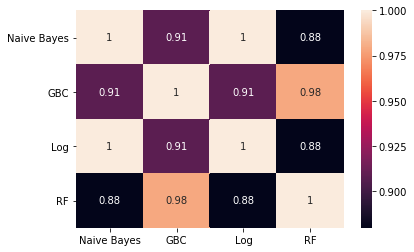

In [35]:
ensemble_results = pd.concat([test_Survived_NaiveBayes,
                              test_Survived_GBC, 
                              test_Survived_LogReg,
                              test_Survived_RF],axis=1)

sns.heatmap(ensemble_results.corr(), annot=True)

---> Ces scores ne sont pas trop mauvais. Evitez les corrélations à plus de 90%